In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
uk_gdf = gpd.read_file(r"C:\Users\Sidrcs\Downloads\Project_GeoJSON\UK\UK_regions.geojson")
uk_gdf.plot()
uk_gdf.head()

C:\Users\Sidrcs\AppData\Local\Temp/ipykernel_14060/3118900185.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [ ]:
import pandas as pd
output_df = pd.read_csv("/content/polarization2000_data.csv")
output_df.head()

Unnamed: 0  std_dev_age  native_share  education_variability  \
0           0    18.275323      0.958919                  462.0   
1           1    18.773603      0.959739                  459.0   
2           2    18.378665      0.923409                  463.0   
3           3    18.756243      0.974206                  251.5   
4           4    18.888780      0.972397                  633.5   

       region_name  job_variability  frac_employed  median_income  gini_index  \
0    East Midlands            462.0       0.511351    8678.310547    0.449646   
1  East of England            459.0       0.503808    9591.965820    0.493658   
2           London            463.0       0.514563   10688.221680    0.505179   
3       North East            251.5       0.466270    8281.648926    0.456207   
4       North West            633.5       0.495268    9418.571777    0.455936   

   Lindqvist_Ostling_S1  Abramowitz_Saunders_S1  Duca_Saving_S1  \
0              5.253813                3.070270        0.000916   
1              4.607416                2.993471        0.001124   
2              6.729660                3.223301        0.003909   
3              4.002635                3.079365        0.000515   
4              4.268719                2.992114        0.006244   

   Lindqvist_Ostling_S2  Abramowitz_Saunders_S2  Duca_Saving_S2  \
0              5.346419                3.014054        0.004936   
1              4.751783                3.112078        0.003207   
2              6.582373                3.077670        0.002390   
3              3.910190                3.011905        0.001883   
4              4.208074                2.909306        0.007112   

   Lindqvist_Ostling_S3  Abramowitz_Saunders_S3  Duca_Saving_S3  
0              4.832573                2.927568        0.000474  
1              4.659702                3.031556        0.000630  
2              6.606390                3.080906        0.000546  
3              3.263072                2.670635        0.000037  
4              3.729493                2.774448        0.002166

In [ ]:
merged_df = pd.merge(uk_gdf, output_df, on = "region_name")

# convert back to GeoPandas DataFrame by specifying the geometry column
merged_gdf = gpd.GeoDataFrame(merged_df, geometry = "geometry")

merged_gdf.head()

nuts118cd         region_name   bng_e   bng_n     long        lat  \
0       UKC          North East  417313  600358 -1.72890  55.297031   
1       UKD          North West  350015  506280 -2.77237  54.449451   
2       UKE  Yorkshire & Humber  446903  448736 -1.28712  53.932640   
3       UKF       East Midlands  477660  322635 -0.84967  52.795719   
4       UKG       West Midlands  386294  295477 -2.20358  52.556969   

                               GlobalID  Shape_Leng  Shape_Area  \
0  cc82fe95-42f3-4da8-99db-1ce6d8216f81   10.209133    1.208364   
1  d68e52e6-2886-4fbf-826a-787245e4aeea   18.577276    1.943654   
2  b6d46527-b101-477c-90f3-b3c268c2c141   13.333495    2.111521   
3  941e33e8-f9d9-461d-8308-73cda75c2a0a   12.660252    2.091811   
4  cccb06b1-bbd2-45d9-9ad0-433d2521d2e6   10.041994    1.721486   

                                            geometry  ...  gini_index  \
0  POLYGON ((-0.79335 54.55831, -1.15462 54.62750...  ...    0.456207   
1  POLYGON ((-2.17021 54.45820, -2.17240 54.53244...  ...    0.455936   
2  POLYGON ((0.01683 53.52586, -0.20442 53.63790,...  ...    0.458670   
3  POLYGON ((0.01683 53.52586, -0.06505 53.51874,...  ...    0.449646   
4  POLYGON ((-1.33190 52.16849, -1.25478 52.19889...  ...    0.446613   

   Lindqvist_Ostling_S1  Abramowitz_Saunders_S1  Duca_Saving_S1  \
0              4.002635                3.079365        0.000515   
1              4.268719                2.992114        0.006244   
2              4.509812                3.110772        0.001893   
3              5.253813                3.070270        0.000916   
4              3.681433                2.980146        0.002404   

   Lindqvist_Ostling_S2  Abramowitz_Saunders_S2  Duca_Saving_S2  \
0              3.910190                3.011905        0.001883   
1              4.208074                2.909306        0.007112   
2              4.420737                2.946138        0.002644   
3              5.346419                3.014054        0.004936   
4              3.828992                2.960293        0.002438   

   Lindqvist_Ostling_S3  Abramowitz_Saunders_S3  Duca_Saving_S3  
0              3.263072                2.670635        0.000037  
1              3.729493                2.774448        0.002166  
2              4.083119                2.903455        0.000163  
3              4.832573                2.927568        0.000474  
4              3.507413                2.848485        0.000745  

[5 rows x 27 columns]

In [ ]:
import libpysal as lps
import esda
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y = merged_gdf["Lindqvist_Ostling_S3"] # target variable
wq =  lps.weights.Queen.from_dataframe(merged_gdf) # compute the spatial weights
wq.transform = 'r' # spatial weights require that the matrix is row-standardized 
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.3909356367745522

In [ ]:
li = esda.moran.Moran_Local(y, wq)

In [ ]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 3, 0, 0, 0, 1, 1, 0, 0, 0, 3])

In [ ]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

Text(0.5, 1.0, 'Polarization')

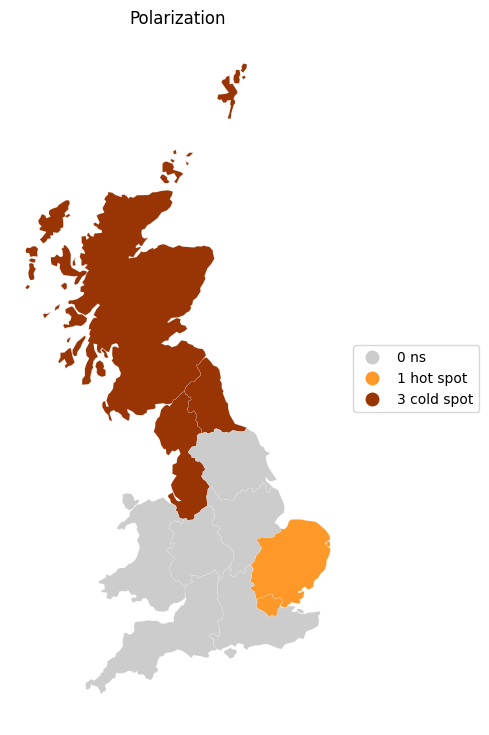

In [ ]:
df = merged_gdf
from matplotlib import colors
hmap = colors.ListedColormap(['#ccc','#d95f0e','#fe9929','#fed98e','#993404'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
plt.title('Polarization')